In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import trimesh as tri

sys.path.insert(0,"../")
from utils import shape_stochastics, mesh_processing

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Application on the Stanford bunny (or any 3D mesh)

In [2]:
# First, get the data to work with it
def get_data(file):
    mesh = o3d.io.read_triangle_mesh(file)
    V, F, Rho = mesh_processing.getDataFromMesh(mesh)
    return(V,F,Rho)

V,F,Rho = get_data("../data/test_data/bunny.ply")

mesh = tri.Trimesh(V,F)
new_mesh_V, new_mesh_F = mesh_processing.decimate_mesh(V,F,target = 1776) # decimate mesh to speed up computation
new_mesh = tri.Trimesh(vertices = new_mesh_V, faces = new_mesh_F)

In [3]:
# Normalize the data with respect to the unit sphere used as reference to apply the noise
new_mesh_V[:,0] = (new_mesh_V[:,0] - new_mesh_V[:,0].mean()) / new_mesh_V[:,2].max(axis=0)
new_mesh_V[:,1] = (new_mesh_V[:,1] - new_mesh_V[:,1].mean()) / new_mesh_V[:,2].max(axis=0)
new_mesh_V[:,2] = (new_mesh_V[:,2] - new_mesh_V[:,2].mean()) / new_mesh_V[:,2].max(axis=0)

new_mesh = tri.Trimesh(vertices = new_mesh_V, faces = new_mesh_F)

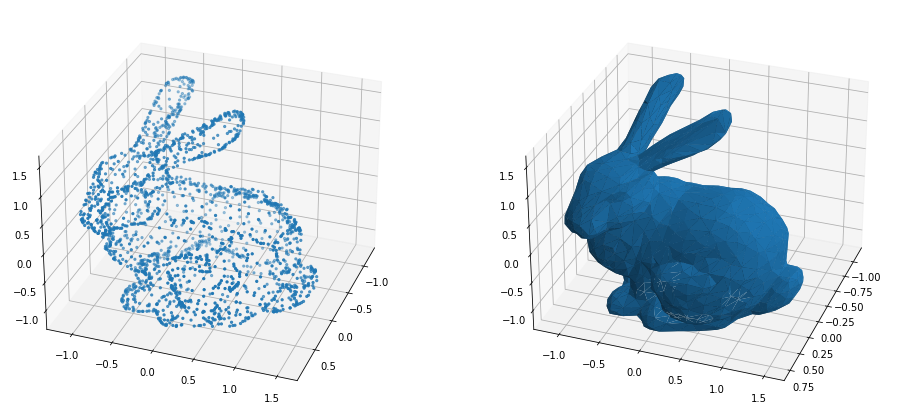

In [4]:
(x_mesh, y_mesh, z_mesh) = new_mesh_V[:,0], new_mesh_V[:,1], new_mesh_V[:,2]

# Take a look at your original mesh
fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_mesh, y_mesh, z_mesh, s = 5)
ax1.view_init(30, 20, 'y')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(x_mesh, y_mesh, triangles=new_mesh_F , Z=z_mesh)
ax2.view_init(30, 20, 'y')

plt.show()

In [5]:
# Compute Q-Wiener process

n = 25
Q = np.eye(n)

shape_stochastics.compute_wiener_process_shape(x_mesh=x_mesh, y_mesh=y_mesh, z_mesh=z_mesh, faces=new_mesh_F, Q=Q, n = 25, t=1, 
                                               n_step=20, make_gif=True, 
                                               file_dir = "tests/wiener_process_bunny", file_name = "test.gif")

array([[[-0.11414344, -0.28782556, -0.65770415, ..., -0.05923922,
         -0.73639814, -0.740594  ],
        [ 0.47267284,  0.5067438 ,  0.86986016, ...,  0.90762811,
          0.8536739 ,  0.75430177],
        [-0.05910063, -0.09988711,  0.50695189, ..., -0.19318115,
         -0.82383067, -0.36458137]],

       [[-0.11948766, -0.28172184, -0.65753327, ..., -0.069929  ,
         -0.7218937 , -0.72414638],
        [ 0.48589859,  0.49968688,  0.88021804, ...,  0.93573856,
          0.87486249,  0.76318762],
        [-0.06578941, -0.0952139 ,  0.5056408 , ..., -0.21230386,
         -0.81059089, -0.34879791]],

       [[-0.12907106, -0.28400164, -0.6238469 , ..., -0.09728393,
         -0.75760039, -0.73648371],
        [ 0.50288961,  0.50689224,  0.88373105, ...,  0.95655782,
          0.84595378,  0.76149025],
        [-0.06523933, -0.09456646,  0.49444643, ..., -0.2037451 ,
         -0.82009102, -0.34110017]],

       ...,

       [[-0.12133451, -0.26722306, -0.62752801, ..., -0.0660347